In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
iris = load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
features = iris['data']
feature_names = iris['feature_names']
label = iris['target']
df = pd.DataFrame(features, columns = feature_names)

In [7]:
pd.DataFrame(features, columns = feature_names)
df['target'] = label

# 00 Data exploration

## (1) sepal length - speal width

ValueError: too many values to unpack (expected 2)

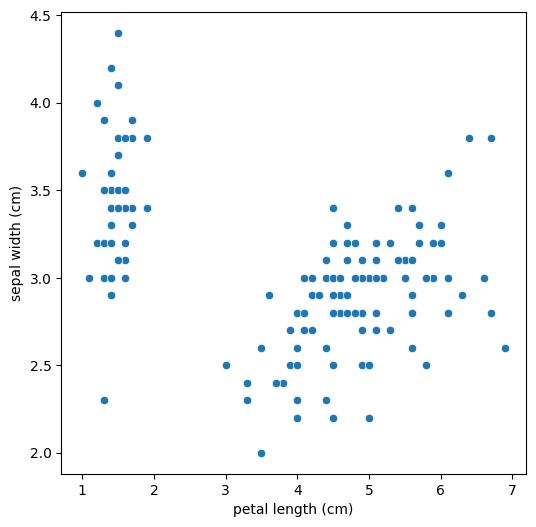

In [12]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='petal length (cm)', y= 'sepal width (cm)')
hue=df['target'], palette = 'muted'
plt.title('petal length - sepal width')

In [30]:
from scipy.stats import pearsonr

In [29]:
!pip3 install scipy

In [31]:
df['sepal length (cm)']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

In [32]:
df['sepal width (cm)']

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal width (cm), Length: 150, dtype: float64

In [33]:
pearsonr(df['sepal length (cm)'], df['sepal width (cm)'])

PearsonRResult(statistic=-0.11756978413300195, pvalue=0.15189826071144857)

In [35]:
pearsonr(df['petal length (cm)'], df['petal width (cm)'])

PearsonRResult(statistic=0.9628654314027969, pvalue=4.6750039073204644e-86)

In [37]:
np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])

array([[ 1.        , -0.11756978],
       [-0.11756978,  1.        ]])

In [38]:
np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])[0][1]

-0.11756978413300198

In [39]:
np.corrcoef(df['sepal length (cm)'], df['sepal width (cm)'])[0]

array([ 1.        , -0.11756978])

In [43]:
df_sepal = df.iloc[:, 0:2]

In [44]:
df_sepal.corr(method='pearson')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [45]:
df_petal = df.iloc[:, 2:4]

In [46]:
df_petal.corr(method='pearson')

,petal length (cm),petal width (cm)
petal length (cm),1.000000,0.962865
petal width (cm),0.962865,1.000000


In [52]:
df_no_target

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
df_no_target = df.drop(['target'], axis=1)

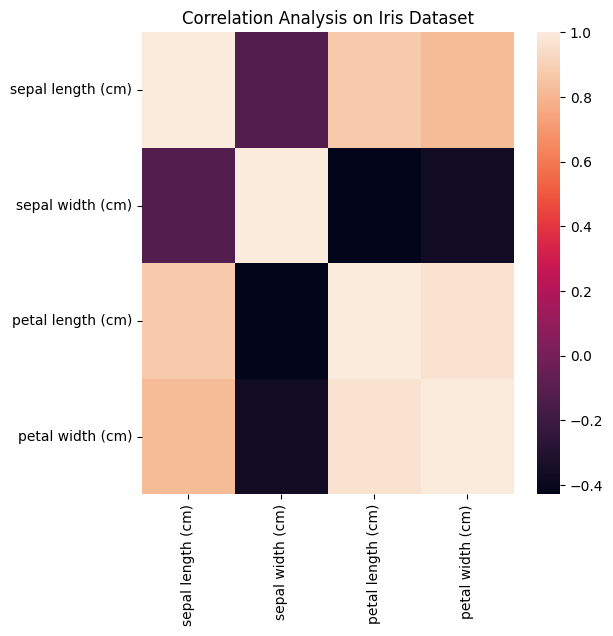

In [53]:
plt.figure(figsize=(6,6))
sns.heatmap(df_no_target.corr(method='pearson')), cmap=''
plt.title('Correlation Analysis on Iris Dataset')
plt.show()

<Figure size 600x600 with 0 Axes>

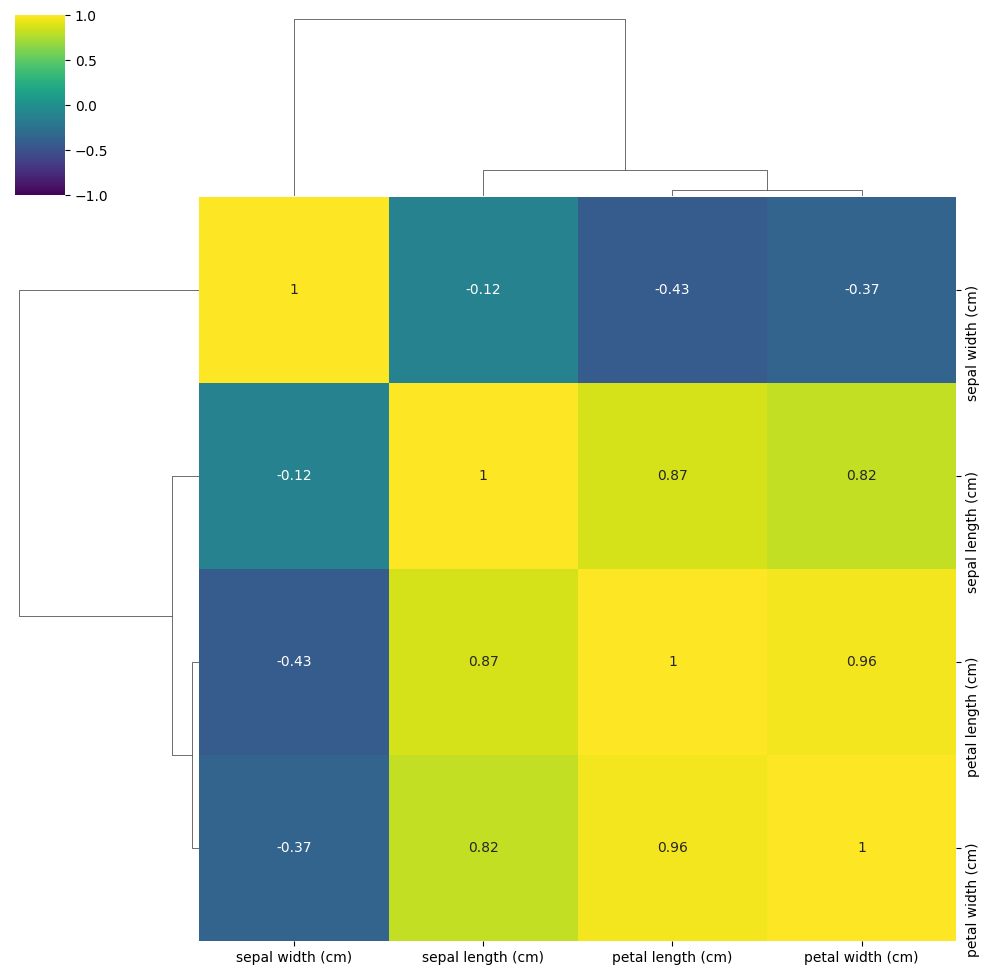

In [59]:
plt.figure(figsize=(6,6))
sns.clustermap(df_no_target.corr(method='pearson'),
              annot=True,
              cmap='viridis',
              vmin=-1,
              vmax=1)

In [61]:
from scipy.stats import spearmanr

In [62]:
spearmanr(df['sepal length (cm)'], df['sepal width (cm)'])

SignificanceResult(statistic=-0.166777658283235, pvalue=0.04136799424884587)

In [63]:
spearmanr(df['petal length (cm)'], df['petal width (cm)'])

SignificanceResult(statistic=0.9376668235763412, pvalue=8.156596854126675e-70)

In [64]:
df_sepal.corr(method='spearman')

,sepal length (cm),sepal width (cm)
sepal length (cm),1.000000,-0.166778
sepal width (cm),-0.166778,1.000000
